# What I can do with Biopython
- The ability to parse bioinformatics files into Python utilizable data structure. The formats including Balst output, FASTA, Genbank, etc
- Files in the supported formats can be iterated over record by record or indexed and accessed via a Dictionary interface
- Code to deal with popular online bioinformatic destinations, such as NCBI and ExPASy
- Interfaces to common bioinformatics programs, such as Standalone Blast from NCBI, Clustalw alignment program and EMBOSS command line
- A standard sequence class that deals with sequences, ids on sequences, and sequence features
- Tools for performing common operations on sequences, such as translation, transcription and weight calculations.
- Code to perform classification of data using k Nearest Neighbors, Naive Bayes or Support Vector Machines.
- Code fir dealing with alignment, including a standard way to create an deal with substitution matrices
- Code making it easy to split up parallelizable tasks into separate processes.
- GUI-based programs to do basic sequence manipulations, translations, BLASTing, etc

In [56]:
import Bio
from Bio.Seq import Seq
from Bio.Seq import MutableSeq
print(Bio.__version__)

1.81


# Chapter 1: Sequence Object(the *Seq* object)

The main differece between *Seq* objects and standard Python strings is they have different methods. *Seq* object supports many of the same method as a plain string, its *translate()* method differs by doing biological translation and there are also addition biolofically relevant methods like *reverse_complement()*


## *Seq* object act like strings

You could access the Seq object using the method we normally use in dealing with Python string object, like getting the length, iterating over the elements.

## Unsing *enumerate()* method

In [57]:
my_seq = Seq('CGATTAGC')

for index, letter in enumerate(my_seq):
    print('%i %s' %(index, letter))

0 C
1 G
2 A
3 T
4 T
5 A
6 G
7 C


## Accessing elements in the sequence by index

In [58]:
print(my_seq[1])
print(my_seq[-1])

G
C


## *.count()* method in *Seq* object

Just the string in Python, the *Seq* object has a *.count()* method, which return non-overlapping count and it is **case sensitive**.

In [59]:
print(Seq("AAAAAAAA").count('AA'))
print('AAAAAA'.count('aa'))

4
0


## Slicing a sequence

*Seq* Object could be slided by using index with the grammar of *Seq[Start:End:Interval]*

In [60]:
my_seq = Seq('AGCTCTGATCGATCGATGATCAGTACTAGCTAGTCTACGTAGCTAGCTAGCAT')
print(my_seq[4:12]) # getting index from index 4 to 12
print(my_seq[0::3]) # starting from index 0, taking base from every 3 bases
print(my_seq[1::3]) # starting from index 1, taking base from every 3 bases
print(my_seq[2::3]) # starting from index 2, taking base from every 3 bases
print(my_seq[::-1]) # flip the sequence

CTGATCGA
ATGCTAAAAATTATCGAA
GCAGCTTGCGACCATCGT
CTTAGGCTTCGTGGATC
TACGATCGATCGATGCATCTGATCGATCATGACTAGTAGCTAGCTAGTCTCGA


## Turning *Seq* objects into strings

*Seq* object could turn into string by using the *str()* command and this could be used in converting a *Seq* object into **unwrapped** FASTA format record

In [61]:
print(str(my_seq))
fasta_format_string = '>Name \n%s\n' % my_seq
print(fasta_format_string)

AGCTCTGATCGATCGATGATCAGTACTAGCTAGTCTACGTAGCTAGCTAGCAT
>Name 
AGCTCTGATCGATCGATGATCAGTACTAGCTAGTCTACGTAGCTAGCTAGCAT



## Concatenating or adding sequences

Two *Seq* Object could be concatenated by adding them, a *for* loop and *.join()* method. Biopython does not check the sequence contects and ***will not*** rase an exception if you concatenate a protein sequence and a DNA sequence(which is likely to be a mistake).

In [62]:
Seq1 = Seq('ACGTAG')
Seq2 = Seq('AGCTAGC')
Seq3 = Seq('TGACTA')
Spacer = Seq('N'*10)
Protein_seq = Seq('EVRNAK')

print(Seq1+Seq2+Seq3) # Concatenating by adding

# Concatenating by for loop
SeqCluster  = [Seq1, Seq2, Seq3]
ConcatenatedSeq = Seq('')
for i in SeqCluster:
    ConcatenatedSeq += i
print(ConcatenatedSeq)

# Concatenating by .join() method
SpacerSeq = Spacer.join(SeqCluster)
print(SpacerSeq)

ACGTAGAGCTAGCTGACTA
ACGTAGAGCTAGCTGACTA
ACGTAGNNNNNNNNNNAGCTAGCNNNNNNNNNNTGACTA


## Changing case

Python strings have very useful *upper()* and *lower()* methods for changing case.

In [63]:
DNASeq = Seq('ACGTCGATCacgtacgat')
print(DNASeq.upper())
print(DNASeq.lower())

ACGTCGATCACGTACGAT
acgtcgatcacgtacgat


## *complements()* and *reverse_complement()* method in *Seq* object

For nucleotide sequences, you could easily obtain the complement or reverse complement of a *Seq* object by using the built-in *complement()* and *reverse_complement* method. You would get biologically meaningless result if you input a protein sequence.

In [64]:
my_seq = Seq('AGCTAGCTAGACTAGTGATCAGCTAGCTA')
print(my_seq)
print(my_seq.complement())
print(my_seq.reverse_complement())

AGCTAGCTAGACTAGTGATCAGCTAGCTA
TCGATCGATCTGATCACTAGTCGATCGAT
TAGCTAGCTGATCACTAGTCTAGCTAGCT


## *transcribe()* and *translate()* method in *Seq* object(Transcription and Translation)

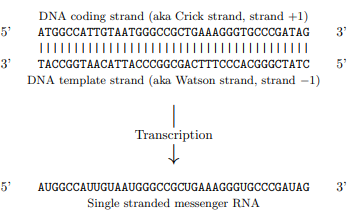

Biologically speaking, transcription process starts from the template strand and doing a reverse complement to make mRNA. But in Biopython and in general bioinformatics, we typically work directly with the coding strand, because it's way easier to just switching T to U. In Biopython, we have *transcribe()*(DNA to mRNA) and *back_transcribe()*(mDNA to DNA) method to do those jobs.

In [65]:
CodingDNA = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
print(CodingDNA)
MessengerRNA = CodingDNA.transcribe()
print(MessengerRNA)
print(MessengerRNA.back_transcribe())

# To simulate what is really happening in cell
TemplateDNA = CodingDNA.reverse_complement()
MessengerRNA = TemplateDNA.reverse_complement().transcribe() # Enzyme working on Template DNA to get mRNA
print(MessengerRNA)

ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG


The mRNA information could be tranlated to protein sequence by using the *translate()* method. *Tanslate()* method have some alternative arguments you could use. 
- *table* argument could change the translation table you could use. Different creatures or organelles have different genetic codes(translation tables) and the default value for this argument is the standard genetic code from NCBI. 
- *to_stop* argument could stop deciphering a sequence when a stop coden is detected. The default value for this argument is False.
- *stop_symbol* argument could replace the default stop codon symbol '*' with arbitrary symbol you assigned.
- *cds* argument will tell Biopython to translate an alternative start codon as methionine and make sure your sequence is a valid CDS(An exception will be raised if not). The default value is False. Use this argument if you know that your sequence ***starts with a start codon, ends with a stop codon and has no internal in-frame stop codons.***

In [66]:
CodingDNA = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
print(CodingDNA.translate()) #using translation function
print(CodingDNA.translate(table='Vertebrate Mitochondrial')) #using genetic code of vertibrate mitochondrial to do translation
print(CodingDNA.translate(table=2)) #using different genetic code to do translation by indexing
print(CodingDNA.translate(to_stop=True)) # stop the code when meeting end codon
print(CodingDNA.translate(stop_symbol='@')) # replacing * with @ as end codon

gene = Seq(
"GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCA"
"GCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGAT"
"AATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACAT"
"TATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCAT"
"AAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA"
)

print(gene.translate(table='Bacterial'))
print(gene.translate(table='Bacterial',to_stop=True))
print(gene.translate(table="Bacterial", cds=True))


MAIVMGR*KGAR*
MAIVMGRWKGAR*
MAIVMGRWKGAR*
MAIVMGR
MAIVMGR@KGAR@
VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR*
VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR
MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDHGWWKQHYEWRGNRWHLHGPPPPPRHHKKAPHDHHGGHGPGKHHR


## Comparing *Seq* objects

In Biopython, the package could track down the molecule types and then comparing your sequence. For example, the DNA 'ACG' is different than the RNA and protein 'ACG'. In Biopython, the sequence comparison only looking at sequence and compares like Python string.

In [67]:
Seq1 = Seq('AGCT')
print(Seq1 == "AGCT")

True


## Sequence with undefined and partially defined sequence contents

In some cases, the length of a sequence may be known but not the actual letters constituting it. We could create a *Seq* object with the argument *None*, followed by the sequence length. We could use this method without specifying the sequence content explicitly.

In [68]:
UnknownSeq = Seq(None, 10)
# print(UnknownSeq) # Bio.Seq.UndefinedSequenceError: Sequence content is undefined
print(len(UnknownSeq))

10


Sometimes the sequence contents is defined by part of sequences only and undefined elsewhere. For example MAF(Multiple Alignment Format) file shows an alignment of creature's genome sequence with the format of '(starting position) + (size of aligned sequence) (aligned sequence)', like s rn5.chr4    42326848 36 + 248343840 CTGAAAACCTAAGTAGGAGAGACAGTTAAAGATAAT. We only know part of the sequence in the whole genome. 

So we could create a partially defined *Seq* object by using a dictionary for the *data* argument, where the key is the starting coordinates of the known sequence segmnet and the values are the corresponding sequences contents. 

In [69]:
seq = Seq({117512683: "TTGAAAACCTGAATGTGAGAGTCAGTCAAGGATAGT"}, length=159345973)

seq[1000:2000] #Seq(None, length=1000)
seq[117512690:117512700] #Seq('CCTGAATGTG')
seq[117512670:117512690] # Seq({13: 'TTGAAAA'}, length=20)
seq[117512700:] #Seq({0: 'AGAGTCAGTCAAGGATAGT'}, length=41833273)

Seq({0: 'AGAGTCAGTCAAGGATAGT'}, length=41833273)

## *MutableSeq objects*

*Seq* object is "read-only" or immutable, so you could not modify sequence by directly give them number and indexing. But you could convert it into a mutable sequence by using *MutableSeq* object and do everything you want. 

In [70]:
mutable_seq = MutableSeq(my_seq)
print(mutable_seq)
print(type(mutable_seq))
mutable_seq[5] = "C"
print(mutable_seq)
mutable_seq.remove("T")
print(mutable_seq)
mutable_seq.reverse()
print(mutable_seq)

AGCTAGCTAGACTAGTGATCAGCTAGCTA
<class 'Bio.Seq.MutableSeq'>
AGCTACCTAGACTAGTGATCAGCTAGCTA
AGCACCTAGACTAGTGATCAGCTAGCTA
ATCGATCGACTAGTGATCAGATCCACGA


# Chapter 2:  Sequence ananotation objects

In this chapter, we will introduce some features in Biopython which is above *Seq* class. *SeqRecord* and *SeqFeature* objects define identifiers and features associate with the *Seq* Object which is used throughout the sequence input/output interface *Bio.SeqIO*.

## *SeqRecord* class and its attributes

The *SeqRecord* class enable you to add identifiers and features to be associated with sequence which is basic data type for the *Bio.SeqIO* sequence input/output interface. The *SeqRecord* class is simple, it has *attributes* as below:

- *.seq*: The sequence itself, typically a *Seq* object.
- *.id*: The primary ID used to identify the sequence. i.e. accession number
- *.name*: A "common" name/id for the sequence. In some case, it's the same as the accession number, but it also could be a clone name.
- *.description*: A human readable description or expressive name for the sequence.
- *.letter_annotations*: Hold per-letter-annotations using a restricted dictionary of additional information about the letters in the sequence. Keys are the name of the information(quality scores, scondary structure, methylation pattern, etc.) and the values are as a Python list, tuple, or string with the smae length as the sequence itself.
- *.annotation*: A dictionary of additional information about the sequence. The keys are the name of the information, and the information is contained in the value. This allowed more "unstructured" information to the sequence. 
- *.features*: A list of *SeqFeature* objects with more constructed information about the features on a sequence(e.g. position of a gene on a genome or domains on a protein sequence)
- *.dbxrefs*: A list of database cross-references.

### Generating a *SeqRecord* object from scratch

To use *SeqRecord*, you ***start*** with a *Seq* object and give the attributes values. If the attributes are not given values, they will be set as strings indicating they are unknown. **If you want to output your SeqRecord to a file, it must have a identifier(.id).** 

In [71]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqFeature
from Bio import SeqIO

In [72]:
SimpleSeq = Seq('ATCGGCAT')
SimpleSeqR = SeqRecord(SimpleSeq)

# Giving value to attributes of SeqRecord

SimpleSeqR.id = "AC12345"
SimpleSeqR.description = "Made-up Sequences"

print(SimpleSeqR.seq, SimpleSeqR.id,SimpleSeqR.description)

ATCGGCAT AC12345 Made-up Sequences


*.annotation* could be used for any miscellaneous annotations that does not fit under one of the other more specific attributes. Annotations could be used as followed:

In [73]:
SimpleSeqR.annotations['Evidence'] = 'I made that up.'
SimpleSeqR.annotations['Methylation'] = [1,2,3]

print(SimpleSeqR.annotations)
print(SimpleSeqR.annotations['Evidence'])

{'Evidence': 'I made that up.', 'Methylation': [1, 2, 3]}
I made that up.


Working with per-letter-annotations is similar, *letter_annotations* is a dictionary like attribute which will let you assign any Python sequence (i.e. a string, list or tuple) which has ***the same length*** as the sequence:

In [74]:
SimpleSeqR.letter_annotations['phred_quality'] = [40,30,38,30,40,38,40,30]
print(SimpleSeqR.letter_annotations)
print(SimpleSeqR.letter_annotations['phred_quality'])

{'phred_quality': [40, 30, 38, 30, 40, 38, 40, 30]}
[40, 30, 38, 30, 40, 38, 40, 30]


### Genrating *SeqRecord* onjects from FASTA files

*Bio.SeqIO.parse()* could be used to parse FASTA(.fna) and Genbank files(.gb). The information in the FASTA and Genbank files will be given into the *SeqRecord* object's attributes. This example uses a fairly large FASTA file containing the whole sequence for Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, originally downloaded from the NCBI. 

In [75]:
Record = SeqIO.read("NC_005816.fna", "fasta")
print(Record)
print(Record.id)
print(Record.name)
print(Record.description)
print(Record.dbxrefs)
print(Record.annotations)
print(Record.letter_annotations)
print(Record.features)

ID: gi|45478711|ref|NC_005816.1|
Name: gi|45478711|ref|NC_005816.1|
Description: gi|45478711|ref|NC_005816.1| Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence
Number of features: 0
Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG')
gi|45478711|ref|NC_005816.1|
gi|45478711|ref|NC_005816.1|
gi|45478711|ref|NC_005816.1| Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence
[]
{}
{}
[]


The first word of the FASTA files is used for both *.id* and *.name* attributes. The whole first line is used as *.description*. All the other attributes will leave in blank.

### Genearating *SeqRecord* objects from Genbank files

Just as the FASTA files, we could also import Genbank files into a *SeqRecord* objects. Normally, a Genbank should format as below:

LOCUS NC_005816 9609 bp DNA circular BCT 21-JUL-2008
DEFINITION Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete
sequence.
ACCESSION NC_005816
VERSION NC_005816.1 GI:45478711
PROJECT GenomeProject:10638
......

In [76]:
Record = SeqIO.read("NC_005816.gb","genbank")
print(repr(Record))

SeqRecord(seq=Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG'), id='NC_005816.1', name='NC_005816', description='Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence', dbxrefs=['Project:58037'])


In [77]:
print(Record.id)
print(Record.name)
print(Record.description)
print(Record.annotations)
print(Record.letter_annotations)
print(Record.dbxrefs)
print(Record.features)
print(len(Record.features))

NC_005816.1
NC_005816
Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence
{'molecule_type': 'DNA', 'topology': 'circular', 'data_file_division': 'BCT', 'date': '21-JUL-2008', 'accessions': ['NC_005816'], 'sequence_version': 1, 'gi': '45478711', 'keywords': [''], 'source': 'Yersinia pestis biovar Microtus str. 91001', 'organism': 'Yersinia pestis biovar Microtus str. 91001', 'taxonomy': ['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacteriales', 'Enterobacteriaceae', 'Yersinia'], 'references': [Reference(title='Genetics of metabolic variations between Yersinia pestis biovars and the proposal of a new biovar, microtus', ...), Reference(title='Complete genome sequence of Yersinia pestis strain 91001, an isolate avirulent to humans', ...), Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...)], 'comment': 'PROVISIONAL REFSEQ: This record has not yet been subject to final\nNCBI review. The reference sequence was derived f

## Feature, location and position objects

### *SeqFeature* object

*SeqFeature* object attempt to encapsulate as much of the information about **a region on parent sequence**, typically a *SeqRecord* object. The *SeqFeature* object is defined with *location* object, typically between two positions. *SeqFeature* has a number number of attributes whihc are listed below:

- *.type*: This is a textual description of the type of feature, like CDS and gene.
- *.location*: The location of the *SeqFeature* on the sequence that you are dealing with. It includes a number of shortcut attributes for properties of the location.
  - *.ref*: shorthand for *.location.ref*. Any reference sequence the location is referring to. Usually just None.
  - *.ref_db*: shorthand for *.location.ref_db*. Specifies the database any identifier in *.ref* refers to. Usually just None.
  - *.strand*: shorthand for *.location.strand*. The strand that the sequence that the feature is located on.
    - 1 for the top strand of a dsDNA.
    - -1 for the bottom strand of a dsDNA.
    - 0 for the strand is important but is unknown.
    - None for it does not matter, normally for proteins or ssDNA.
- *.qualifier*: Use a Python dictionary of additional information about the feature. the key is one-word description of the information and the value is the actual information. This is a reflection of the feature tables in Genbank/EMBL files.

### Position and location

Postion and location is to describe a region on a parent sequence. Location object is described by the range between two positions. 

- Position: This refers to a region in the sequence, which could be ambiguous or clear. e.g. 5, 20, >200, <100 could all be positions.
- Location: This refers to a certain sequence location defined by a clear vaule. e.g. 3, 20.
  
#### *SimpleLocation* object

**Unless you work with eukaryotic genes**, most *SeqFeature* locations are extremely simple - you just need **start and end** coordinates and a strand. That’s essentially all the basic *SimpleLocation* object does.

#### *CompoundLocation* object

If you have to deal with complex locations made up of multiple regions are represented, *CompoundLocation* will be a useful tool. This feature is normally used to handle 'join' location in EMBL/GenBank files.

#### Fuzzy Position:

 For example, in a dinucleotide priming experiment and discover that the start of mRNA transcript starts at one of two sites. We could use the fuzzy postion function in Biopython to address this problem. Five classes are designed in Biopython to deal with the fuzzy position problem if you did not figure out where is the start point.

- *ExactPosition*: Represents a position which is specified as exact along the sequence.
- *BeforePosition*: Represents a fuzzy position that occurs prior to some specified site. In Genbank/EMBL notation, this is represented as something like '<13'.
- *AfterPosition*: Represents a fuzzy postion that occurs after some specified site. In Genbank/EMBL notation, this is reoresented as something like '>13'.
- *WithinPosition*: Occasionally used for Genbank/EMBL locations, this class models a position which occurs somewhere between  two specified nucleotides. In Genbank/EMBL notation, this would be represented as (1,5).
- *OneOfPosition*: Occasionally used for Genbank/EMBL locations, this class deals with a position where several possible values exist.
- *UnknownPosition*: This class deals with a position of unknown location. This is not used in Genbank/EMBL, but corresponds to the '?' feature coordinate used in UniProt.
 

In [78]:
start_position = SeqFeature.AfterPosition(5)
end_position = SeqFeature.BetweenPosition(9,left=8, right=9) #either left or right should be the position
my_location = SeqFeature.SimpleLocation(start_position,end_position)

print(my_location)
print(my_location.start)
print(my_location.end)

[>5:(8^9)]
>5
(8^9)


If you have a SNP of interest and you want to know which feature this SNP within, we could use a for loop to check all the features.

In [79]:
my_snp = 4350
Record = SeqIO.read('NC_005816.gb','genbank')
for feature in Record.features:
    if my_snp in feature:
        print("%s %s" % (feature.type, feature.qualifiers.get("db_xref")))

source ['taxon:229193']
gene ['GeneID:2767712']
CDS ['GI:45478716', 'GeneID:2767712']


### Sequence describes by a feature or location

*SeqFeature* or location object doesn't directly contain a sequence, but the location describe how to get this from the parent sequence by [slicing](#slicing-a-sequence). 

In [80]:
from Bio.SeqFeature import SeqFeature, SimpleLocation

seq = Seq("ACCGAGACGGCAAAGGCTAGCATAGGTATGAGACTTCCTTCCTGCCAGTGCTGAGGAACTGGGAGCCTAC")
feature = SeqFeature(SimpleLocation(5,18, strand = -1), type = 'gene')

feature_seq = seq[feature.location.start:feature.location.end].reverse_complement()
print(feature_seq)

AGCCTTTGCCGTC


If you need to deal with compound features which is rather messy than the simple example. We have a *.extract* mothed to concatenate all the sequence.

In [81]:
feature_seq = feature.extract(seq)
print(feature_seq)

AGCCTTTGCCGTC


## Comparison

Two *SeqRecord* objects normally can not be compared, it will raise an explicit error(NotImplemented Error) if you try to do that. But you could still compare two *SeqRecord* by comparing the attributes.

In [82]:
record1 = SeqRecord(Seq('ACGT'), id = 'test')
record2 = SeqRecord(Seq('ACGT'), id = 'test')

print(record1.seq == record2.seq)
print(record1.id == record2.id)

True
True


## References

Another common annotation related to a sequence is a reference to a journal or other published work dealing with sequence. So, a class *Bio.SeqFeature.Reference*, is designed to store the relevent information about a reference as attibutes of an object.

## The *.format* method for *SeqFeature* object

The *format()* method of the *SeqRecord* class gives a string containing your record record formatted using one of the output file formates supported by *Bio.SeqIO*, such as FASTA:

In [83]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

record = SeqRecord(
Seq(
    "MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD"
    "GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK"
    "NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM"
    "SSAC"
    ),
    id="gi|14150838|gb|AAK54648.1|AF376133_1",
    description="chalcone synthase [Cucumis sativus]",
 )

print(record.format("fasta"))

>gi|14150838|gb|AAK54648.1|AF376133_1 chalcone synthase [Cucumis sativus]
MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD
GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK
NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM
SSAC



## Slicing a *SeqRecord* object

You can slice a *SeqRecord*, to give you a new *SeqRecord* covering just part of the sequence. What is important here is that any per-letter annotations are also sliced, and any features which fall completely within the new sequence are preserved (with their locations adjusted).

In [84]:
record = SeqIO.read('NC_005816.gb','genbank')
print(record.features[21])
print(record.features[20])


type: CDS
location: [4342:4780](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GI:45478716', 'GeneID:2767712']
    Key: gene, Value: ['pim']
    Key: locus_tag, Value: ['YP_pPCP05']
    Key: note, Value: ['similar to many previously sequenced pesticin immunity protein entries of Yersinia pestis plasmid pPCP, e.g. gi| 16082683|,ref|NP_395230.1| (NC_003132) , gi|1200166|emb|CAA90861.1| (Z54145 ) , gi|1488655| emb|CAA63439.1| (X92856) , gi|2996219|gb|AAC62543.1| (AF053945) , and gi|5763814|emb|CAB531 67.1| (AL109969)']
    Key: product, Value: ['pesticin immunity protein']
    Key: protein_id, Value: ['NP_995571.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MGGGMISKLFCLALIFLSSSGLAEKNTYTAKDILQNLELNTFGNSLSHGIYGKQTTFKQTEFTNIKSNTKKHIALINKDNSWMISLKILGIKRDEYTVCFEDFSLIRPPTYVAIHPLLIKKVKSGNFIVVKEIKKSIPGCTVYYH']

type: gene
location: [4342:4780](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:2767712']
    Key: gene, Value: ['pim']
    Key: l

In [85]:
sub_record = record[4300:4800]
print(len(sub_record.features))
print(sub_record.features[0]) # locations are adjusted to fit the new parent sequence
print(sub_record.features[1])

2
type: gene
location: [42:480](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:2767712']
    Key: gene, Value: ['pim']
    Key: locus_tag, Value: ['YP_pPCP05']

type: CDS
location: [42:480](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GI:45478716', 'GeneID:2767712']
    Key: gene, Value: ['pim']
    Key: locus_tag, Value: ['YP_pPCP05']
    Key: note, Value: ['similar to many previously sequenced pesticin immunity protein entries of Yersinia pestis plasmid pPCP, e.g. gi| 16082683|,ref|NP_395230.1| (NC_003132) , gi|1200166|emb|CAA90861.1| (Z54145 ) , gi|1488655| emb|CAA63439.1| (X92856) , gi|2996219|gb|AAC62543.1| (AF053945) , and gi|5763814|emb|CAB531 67.1| (AL109969)']
    Key: product, Value: ['pesticin immunity protein']
    Key: protein_id, Value: ['NP_995571.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MGGGMISKLFCLALIFLSSSGLAEKNTYTAKDILQNLELNTFGNSLSHGIYGKQTTFKQTEFTNIKSNTKKHIALINKDNSWMISLKILGIKRDEYTVCFEDFSLIRPPTYVAIHPLLIKK

While Biopython has done something sensible and hopefully intuitive with the features (and any per-letter annotation), for the other annotation it is impossible to know if this still applies to the sub-sequenceor not. To avoid guessing, with the exception of the molecule type, the *.annotations* and *.dbxrefs* are omitted from the sub-record, and it is up to you to transfer any relevant information as appropriate.

## Adding *SeqRecord* objects

You could add *SeqRecord* objects together to a new *SeqRecord* object. Noted that any common per-letter annotations are also added, all the features are preserved(with location adjusted). Common annotations like id, name and description, are kept, but some annotations like the database cross references are lost.

## Reverse-complementing *SeqRecord* objects

For the sequence, this uses the Seq object’s reverse complement method. Any features are transferred with the location and strand recalculated. Likewise any per-letter-annotation is also copied but reversed (which makes sense for typical examples like quality scores). However, transfer of most annotation is problematical.

The SeqRecord object’s reverse_complement method takes a number of optional arguments corresponding to properties of the record. Setting these arguments to True means copy the old values, while False means drop the old values and use the default value. You can alternatively provide the new desired value instead.

In [86]:
from Bio import SeqIO

record = SeqIO.read("NC_005816.gb", "genbank")

print("%s %i %i %i %i" %(record.id, len(record.seq), len(record.features), len(record.dbxrefs), 
                         len(record.annotations)))

rc = record.reverse_complement(id = 'TESTING')

print("%s %i %i %i %i" %(rc.id, len(rc.seq), len(rc.features), len(rc.dbxrefs), 
                         len(rc.annotations)))

NC_005816.1 9609 41 1 13
TESTING 9609 41 0 0


# Chapter 3: Sequence Input/Output

we will discuss more details about the *Bio.SeqIO* module which rpovided a simple interface for working with assorted sequence file formats in a uniform way.

## Parsing or Reading Sequences

The function *Bio.SqeIO.parse()* and *Bio.SeqIO.read()* are used to read sequence data as *SeqRecord* objects. These two function take two arguement:

- The first argument is the *handle* to read the data from, or a filename. 
- The second argument is a lower case specifying sequence format.

The difference between *parse()* and *read()* method is:

- *parse()* returns ***an iterator*** with gives *SeqRecord* objects. So it could be used in **multiple records** in one file.
- *read()* could only deal with files which contain only **one single record**. 

In [87]:
# using parse() method for reading file

from Bio import SeqIO

for seq_record in SeqIO.parse('ls_orchid.fasta', 'fasta'):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
    
for seq_record in SeqIO.parse('ls_orchid.gbk', 'genbank'):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

indentifier = [seq_record.id 
               for seq_record 
               in SeqIO.parse('ls_orchid.gbk','genbank')]
print(indentifier)

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')
740
gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC')
753
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')
748
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT')
744
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA')
733
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC')
718
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT')
730
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA')
704
gi|2765649|emb|Z78524.1|CFZ78524
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC')
740
gi|2765648|emb|Z78523.1|CHZ78523
Seq('CGTAACCAGGTTTCCGT

In [88]:
# interating over the records using interator in a sequence file

record_iterator = SeqIO.parse('ls_orchid.fasta','fasta')

first_record = next(record_iterator)
print(first_record.id)

second_record = next(record_iterator)
print(second_record.id)

gi|2765658|emb|Z78533.1|CIZ78533
gi|2765657|emb|Z78532.1|CCZ78532


In [89]:
# Getting a list of the record in a sequence file using list()

records = list(SeqIO.parse('ls_orchid.gbk','genbank'))

print('This file have %i records' %len(records))

print('The first record')
print(records[0].id)
print(records[0].description)
print(repr(records[0].seq))

This file have 94 records
The first record
Z78533.1
C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC')


In [90]:
# Extracting data using annotation method in SeqRecord

record_iterator = SeqIO.parse('ls_orchid.gbk','genbank')
first_record = next(record_iterator)

print(first_record.annotations)
print(first_record.annotations.keys())
print(first_record.annotations.values())

# If you want to get all the species information in the file

all_species = [species.annotations['organism'] 
               for species 
               in record_iterator]
print(all_species)

{'molecule_type': 'DNA', 'topology': 'linear', 'data_file_division': 'PLN', 'date': '30-NOV-2006', 'accessions': ['Z78533'], 'sequence_version': 1, 'gi': '2765658', 'keywords': ['5.8S ribosomal RNA', '5.8S rRNA gene', 'internal transcribed spacer', 'ITS1', 'ITS2'], 'source': 'Cypripedium irapeanum', 'organism': 'Cypripedium irapeanum', 'taxonomy': ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Asparagales', 'Orchidaceae', 'Cypripedioideae', 'Cypripedium'], 'references': [Reference(title='Phylogenetics of the slipper orchids (Cypripedioideae: Orchidaceae): nuclear rDNA ITS sequences', ...), Reference(title='Direct Submission', ...)]}
dict_keys(['molecule_type', 'topology', 'data_file_division', 'date', 'accessions', 'sequence_version', 'gi', 'keywords', 'source', 'organism', 'taxonomy', 'references'])
dict_values(['DNA', 'linear', 'PLN', '30-NOV-2006', ['Z78533'], 1, '2765658', ['5.8S ribosomal RNA', '5.8S r

In [91]:
# Modifying data

record_iterator = SeqIO.parse('ls_orchid.fasta','fasta')

first_record = next(record_iterator)
first_record.id = 'new_id'
first_record.description = first_record.id + ' ' + 'new_description'
print(first_record.format('fasta'))

>new_id new_description
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAA
CGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGT
GACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCC
CGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCC
CAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAA
CGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTG
AATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCA
GGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCG
GCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCG
GCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTG
GCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCC
TTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGG
GGCACCCGCTGAGTTTACGC



## Parsing sequences from Compressed files

A *with* statement should be used to close the handle automatically and we could use gzip module to open the compressed file for reading.

## Parsing sequences for the net

We could download sequnece data from NCBI and parse it. 

In [92]:
# Connecting to NCBI and get a few Opuntia sequences

from Bio import Entrez
from Bio import SeqIO

Entrez.email = "A.N.Other@example.com"
with Entrez.efetch(
db="nucleotide", rettype="gb", retmode="text", id="6273291,6273290,6273289"
) as handle:
    for seq_record in SeqIO.parse(handle,'gb'):
        print('%s %s...' %(seq_record.id, seq_record.description[:50]))
        print(
            'Sequence length %i, %i features, from: %s'
            %(
                len(seq_record),
                len(seq_record.features),
                seq_record.annotations['source']
            )
             )

AF191665.1 Opuntia marenae rpl16 gene; chloroplast gene for c...
Sequence length 902, 3 features, from: chloroplast Grusonia marenae
AF191664.1 Opuntia clavata rpl16 gene; chloroplast gene for c...
Sequence length 899, 3 features, from: chloroplast Grusonia clavata
AF191663.1 Opuntia bradtiana rpl16 gene; chloroplast gene for...
Sequence length 899, 3 features, from: chloroplast Grusonia bradtiana


We could also download a SwissProt file from ExPASy.

In [93]:
from Bio import ExPASy
from Bio import SeqIO

with ExPASy.get_sprot_raw("O23729") as handle:
    seq_record = SeqIO.read(handle, 'swiss')
 
print(seq_record.id)
print(seq_record.name)
print(seq_record.description)
print(repr(seq_record.seq))
print("Length %i" % len(seq_record))
print(seq_record.annotations["keywords"])

O23729
CHS3_BROFI
RecName: Full=Chalcone synthase 3; EC=2.3.1.74; AltName: Full=Naringenin-chalcone synthase 3;
Seq('MAPAMEEIRQAQRAEGPAAVLAIGTSTPPNALYQADYPDYYFRITKSEHLTELK...GAE')
Length 394
['Acyltransferase', 'Flavonoid biosynthesis', 'Transferase']


## Sequence files as Dictionaries

For self-indexed files, such as files in *.2bit* format, the return value of *SeqIO.parse* can also be used as a dictionary, allowing random access to the sequence contents.

In [94]:
handle = open('hg38.2bit','rb')
records = SeqIO.parse(handle,'twobit')

print(list(records.keys())[:5])
print(records['chr1'].seq[:50])

['chr1', 'chr10', 'chr11', 'chr11_KI270721v1_random', 'chr12']
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN


For other formats, *Bio.SeqIO* provides three related functions module with allow dictionary like random access to a multi-sequence file.

- *Bio.SeqIO.to_dict()* is the most flexible but also the most memory demanding option. This is basically a helper function to build a normal Python dictionary with each entry held as a SeqRecord object in memory, allowing you to modify the records.
- *Bio.SeqIO.index()* is useful middle ground, acting like a read only dictionary and parsing sequences into SeqRecord objects on demand.
- *Bio.SeqIO.index_db* also acts like a read only dictionary but stores the identifiers and file offsets in a file on disk, meaning very low memory usage.

## Writing sequence files

Now we'll look at *Bio.SeqIO.write()* which is for sequence output. This function taking three arguments:

- One or more *SeqRecord* objects
- A handle or filename to write to
- A sequence format

In [95]:
rec1 = SeqRecord(
    Seq(
        "MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD"
        "GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK"
        "NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM"
        "SSAC",
        ),
    id="gi|14150838|gb|AAK54648.1|AF376133_1",
    description="chalcone synthase [Cucumis sativus]",
)
rec2 = SeqRecord(
    Seq(
        "YPDYYFRITNREHKAELKEKFQRMCDKSMIKKRYMYLTEEILKENPSMCEYMAPSLDARQ"
        "DMVVVEIPKLGKEAAVKAIKEWGQ",
    ),
    id="gi|13919613|gb|AAK33142.1|",
    description="chalcone synthase [Fragaria vesca subsp. bracteata]",
    )
rec3 = SeqRecord(
    Seq(
        "MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKEKFKRMC"
        "EKSMIKKRYMHLTEEILKENPNICAYMAPSLDARQDIVVVEVPKLGKEAAQKAIKEWGQP"
        "KSKITHLVFCTTSGVDMPGCDYQLTKLLGLRPSVKRFMMYQQGCFAGGTVLRMAKDLAEN"
        "NKGARVLVVCSEITAVTFRGPNDTHLDSLVGQALFGDGAAAVIIGSDPIPEVERPLFELV"
        "SAAQTLLPDSEGAIDGHLREVGLTFHLLKDVPGLISKNIEKSLVEAFQPLGISDWNSLFW"
        "IAHPGGPAILDQVELKLGLKQEKLKATRKVLSNYGNMSSACVLFILDEMRKASAKEGLGT"
        "TGEGLEWGVLFGFGPGLTVETVVLHSVAT",
    ),
id="gi|13925890|gb|AAK49457.1|",
description="chalcone synthase [Nicotiana tabacum]",
)

my_records = [rec1,rec2,rec3]
SeqIO.write(my_records, 'myexample.faa','fasta')

3

BioPython also has a *.convert()* function to convert formats which will take handles and filenames.

In [96]:
count = SeqIO.convert('ls_orchid.gbk','gb','my_example.fasta','fasta')
print("Converted %i records" % count)

Converted 94 records


## Low level FASTA and FASTQ parsers

Working with the low-level *SimpleFastaParser* or *FastqGeneralIterator* in more practical than *Bio.SeqIO.parse* when dealing with large high-throughout FASTA or FASTQ sequencing files where speed matters.

When parsing FASTA files, internally *Bio.SeqIO.parse()* calls the low-level *SimpleFastaParser* with the file handle. You can iterates over the file handle returning each record as a tuple of two strings, *the title line* and *the sequence*.

In [97]:
from Bio.SeqIO.FastaIO import SimpleFastaParser

count = 0
total_len = 0
with open('ls_orchid.fasta') as in_handle:
    for title, seq in SimpleFastaParser(in_handle):
        count+=1
        total_len+=len(seq)

print('%i records with total sequence length %i' % (count, total_len))

94 records with total sequence length 67518


Likewise, when parsing FASTQ files, *Bio.SeqIO.parse()* will call the low-level *FastqGeneralIterator* with the file handle. It has 3 variable in the handle which are title, sequece and quality scores.

# Chapter 4: Multiple Sequence Alignment objects

In this chapter, we will introduce the *MutipleSeqAlign ment object* whcih holds multiple sequencing alignment data and the *Bio.AlignIO* module for reading and writing them as various file format(as *AlignIO* is following design of *SeqIO*). Note taht both *Bio.SeqIO* and *Bio.AlignIO* can read and write sequence alignment files.

## Parsing or reading sequence alignments

Just like *Bio.SeqIO* module, *Bio.AlignIO* also has *Bio.AlignIO.read()* and *Bio.Align.parse()* for reading and parsing single and multiple alignments

For *Bio.AlignIO.read()*, it returns a single *MultipleSeqALignment* object and *Bio.AlignIO.parse()* returns an iterator which gives *MultipleSeqAlignment* objects.

Both functions expect two mandatory arguments:

- The first argument is a *handle* to read data from.
- The second argument is a lower case string indicating the alignment format.

There's also an optional *seq_count* argument which is discussed below for dealing with ambiguous file formats which may contain more than one alignment.

### Single Alignment

In [98]:
from Bio import AlignIO

alignment = AlignIO.read('PF05371_seed.sth','stockholm')
print(alignment)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


The output is truncated and we need to write a code to iterating over rows as *SeqRecord* objects:

In [99]:
alignment = AlignIO.read('PF05371_seed.sth','stockholm')
print('Alignment length %i' % alignment.get_alignment_length())
for record in alignment:
    print('%s - %s' % (record.seq, record.id))

Alignment length 52
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73


In [100]:
# to look at all the sequence annotation(use a for loop)
print(alignment[0])

ID: COATB_BPIKE/30-81
Name: COATB_BPIKE
Description: COATB_BPIKE/30-81
Database cross-references: PDB; 1ifl ; 1-52;
Number of features: 0
/accession=P03620.1
/start=30
/end=81
Per letter annotation for: secondary_structure
Seq('AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA')


We could also download FASTA file for alignment. we could chose to use dot or dash for gap. In the example, we will use dash.

In [101]:
alignment = AlignIO.read('PF05371_seed.faa','fasta')
print(alignment)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


### Multiple Alignment

Suppose you are bootstrap a phylogenetic tree using the PHYLIP tools, one of the steps would be to create a set of many resampled alignments using the tool *bootseq*.

One of the handicaps of the original PHYLIP alignment file format is that the sequence identifiers are strictly truncated at ten characters.

In [102]:
alignments = AlignIO.parse('resampled.phy','phylip')
for alignment in alignments:
    print(alignment)

Alignment with 5 rows and 6 columns
AAACCA Alpha
AAACCC Beta
ACCCCA Gamma
CCCAAC Delta
CCCAAA Epsilon
Alignment with 5 rows and 6 columns
AAACAA Alpha
AAACCC Beta
ACCCAA Gamma
CCCACC Delta
CCCAAA Epsilon
Alignment with 5 rows and 6 columns
AAAAAC Alpha
AAACCC Beta
AACAAC Gamma
CCCCCA Delta
CCCAAC Epsilon
Alignment with 5 rows and 6 columns
AAAACC Alpha
ACCCCC Beta
AAAACC Gamma
CCCCAA Delta
CAAACC Epsilon


### Ambiguous Alignment

Many alignment file formats can explicitly store more than one alignment and the division between each alignment is clear. However, some formats like FASTA do not have such a block structure.

For example: 

>Alpha
ACTACGACTAGCTCAG--G
>Beta
ACTACCGCTAGCTCAGAAG
>Gamma
ACTACGGCTAGCACAGAAG
>Alpha
ACTACGACTAGCTCAGG--
>Beta
ACTACCGCTAGCTCAGAAG
>Gamma
ACTACGGCTAGCACAGAAG

This could a single alignment with 6 sequences or two alignments which accidently have the same length judging form the identifiers.

To interpret this kind of FASTA example as several separate alignments, we could use *Bio.AlignIO.Parse()* with the optional *seq_count* argument which specified how many sequence are expected in each alignment. If you have different number of sequences in different alignments in FASTA file, please choose to a better format before inputting to Biopython.  

In [103]:
for alignment in AlignIO.parse('Ambiguous_alignment.fasta','fasta', seq_count=2):
    print('Alignment length %i' % alignment.get_alignment_length())
    for record in alignment:
        print('%s - %s' % (record.seq, record.id))

Alignment length 19
ACTACGACTAGCTCAG--G - Alpha
ACTACCGCTAGCTCAGAAG - XXX
Alignment length 17
ACTACGACTAGCTCAGG - Alpha
ACTACGGCAAGCACAGG - YYY
Alignment length 21
--ACTACGAC--TAGCTCAGG - Alpha
GGACTACGACAATAGCTCAGG - ZZZ


## Writing ALignmennt

Contrary to the input, we could output our alignment through *Bio.ALign.write()*. This function taking three arguments.

- Some *MultipleSeqAlignment* objects or *Alignment* object
- A *handle*
- A sequence format

If you tell the *Bio.Align.write()* function to write to a file that already exists, the old file will be overwrtten without any warning.

In [104]:
#writing some alignments to a file

from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

align1 = MultipleSeqAlignment(
[
    SeqRecord(Seq("ACTGCTAGCTAG"), id="Alpha"),
    SeqRecord(Seq("ACT-CTAGCTAG"), id="Beta"),
    SeqRecord(Seq("ACTGCTAGDTAG"), id="Gamma"),
]
)
align2 = MultipleSeqAlignment(
[
    SeqRecord(Seq("GTCAGC-AG"), id="Delta"),
    SeqRecord(Seq("GACAGCTAG"), id="Epsilon"),
    SeqRecord(Seq("GTCAGCTAG"), id="Zeta"),
]
)
align3 = MultipleSeqAlignment(
[
    SeqRecord(Seq("ACTAGTACAGCTG"), id="Eta"),
    SeqRecord(Seq("ACTAGTACAGCT-"), id="Theta"),
    SeqRecord(Seq("-CTACTACAGGTG"), id="Iota"),
]
)
my_alignments = [align1, align2, align3]

AlignIO.write(my_alignments,'my_example.phy','phylip')

3

### Converting alignments files between different formats

*Bio.AlignIO* works in the same way as the *Bio.SeqIO* in converting formats between different alignments. In *Bio.AlignIO*, we have a *Bio.AlignIO.convert()* funtion just like the *SeqIO*.

Syntax: Bio.AlignIO.convert('input handle','input format','output handle','output format')

Tip: we could use *phylip-relaxed* to output a longer indentifier which is no longer limited to 10 characters.

In [105]:
count = AlignIO.convert('PF05371_seed.sth','stockholm',
                        'PF05371_seed.aln', 'clustal')
print('Converted %i alignments' % count)

Converted 1 alignments


### Output alignment objects as formatted string

Just like *Bio.SeqIO*, *Bio.ALignIO* also supports you to output your align objects in any given format using the Python built-in *.format()* function.

In [106]:
alignment = AlignIO.read('PF05371_seed.sth','stockholm')
print(format(alignment,'clustal'))

CLUSTAL X (1.81) multiple sequence alignment


COATB_BPIKE/30-81                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSS
Q9T0Q8_BPIKE/1-52                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVS
COATB_BPI22/32-83                   DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSS
COATB_BPM13/24-72                   AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPZJ2/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFAS
Q9T0Q9_BPFD/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPIF1/22-73                   FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVS

COATB_BPIKE/30-81                   KA
Q9T0Q8_BPIKE/1-52                   RA
COATB_BPI22/32-83                   KA
COATB_BPM13/24-72                   KA
COATB_BPZJ2/1-49                    KA
Q9T0Q9_BPFD/1-49                    KA
COATB_BPIF1/22-73                   RA





## Manipulating Alignments

### Slicing alignments

Just like *SeqRecord* objects, we could slice the alignment like what we do in Numpy.

In [107]:
alignment = AlignIO.read('PF05371_seed.sth','stockholm')
print('number of rows:%i' % len(alignment))
print(alignment[2:5])

number of rows:7
Alignment with 3 rows and 52 columns
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49


### Slicing Alignment like array

In [108]:
import numpy as np

align_array = np.array(alignment)
print(align_array[:,:10])

[['A' 'E' 'P' 'N' 'A' 'A' 'T' 'N' 'Y' 'A']
 ['A' 'E' 'P' 'N' 'A' 'A' 'T' 'N' 'Y' 'A']
 ['D' 'G' 'T' 'S' 'T' 'A' 'T' 'S' 'Y' 'A']
 ['A' 'E' 'G' 'D' 'D' 'P' '-' '-' '-' 'A']
 ['A' 'E' 'G' 'D' 'D' 'P' '-' '-' '-' 'A']
 ['A' 'E' 'G' 'D' 'D' 'P' '-' '-' '-' 'A']
 ['F' 'A' 'A' 'D' 'D' 'A' 'T' 'S' 'Q' 'A']]


## Getting informationn on the alignment

The *substitutions* property under *MultipleSeqAlignment* object reports how ofter letters i the alignment are substituted each other. This is calculated by taking all pairs of rows in the alignmnet, counting the number of times two letters are aligned to each other and summing this over all pairs.

In [109]:
alignment = MultipleSeqAlignment(
    [
        SeqRecord(Seq('ACTCCTA'), id = 'seq1'),
        SeqRecord(Seq('AAT-CTA'), id = 'seq2'),
        SeqRecord(Seq('CCTACT-'), id = 'seq3'),
        SeqRecord(Seq('TCTCCTC'), id = 'seq4')
    ]
)

substitutions= alignment.substitutions
print(substitutions)

    A    C    T
A 2.0  4.5  1.0
C 4.5 10.0  0.5
T 1.0  0.5 12.0



Note that *MultipleSeqAlignment.substitutions* contains entries for the letters appearing in the alignment only. You can use the *select* method to add entries for missing letters.

In [110]:
m = substitutions.select('ATCG')
print(m)

    A    T    C   G
A 2.0  1.0  4.5 0.0
T 1.0 12.0  0.5 0.0
C 4.5  0.5 10.0 0.0
G 0.0  0.0  0.0 0.0

